## Final Project Submission

Please fill out:
* Student name: Joe Sanchez
* Student pace: self paced 
* Scheduled project review date/time: Monday September 28, 2PM.
* Instructor name: Jeff Herman
* Blog post URL: https://ayeejoeey.github.io/level_1_in_data_science


To approach this project i wanted to start off by analyzing data that was relative to the problem at hand. 
Which was to find what movies were doing the best at box office. And before i started, the first question that came to mind was: "What are some of the most successful movies that have been released in the past 20 years?".
To answer this first question I began by taking a look at some data that was already provided that contained information from websites like IMDB, RottenTomatoes, ThemovieDB.Org
and Box Office Mojo. After reviewing all data, i knew i wanted to form a dataframe that consists of related data when it comes to the success of popular movies. That meant i needed to categorize my findings into both a revenue and profit related standpoint. 

Along my research, a few other questions came to mind, which were: "How much in gross revenue has each movie made?",
"What was the budget of each movie for production?", and "How much profit was gained after release?".
These questions helped mold my findings and helped with the visualiztion process. To conclude, i have created 4 vizualiztion plots making sure to answer these questions, and to provide insight on how to move forward.

To begin my data analysis, i first import my basic needs to conduct my code using import.

In [35]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandasql import sqldf
import matplotlib.ticker as mtick

I then review the given files by reading and assigning each csv file to a dataframe. 

In [2]:
df_name = pd.read_csv('name.basics.csv')
df_gross = pd.read_csv('bom.movie_gross.csv')
df_title_akas = pd.read_csv('title.akas.csv')
df_movie_budget = pd.read_csv('tn.movie_budgets.csv')
df_movies = pd.read_csv('tmdb.movies.csv')
df_title_ratings = pd.read_csv('title.ratings.csv')
df_title_principals = pd.read_csv('title.principals.csv')
df_title_basics = pd.read_csv('title.basics.csv')

In [3]:
# looking over dtypes for the df_movies dataframe to see if the integers dtype is either float64 or int64.
# the column i want to clean and collect is 'vote_average'
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [4]:
df_movies['vote_average'][:1]

0    7.7
Name: vote_average, dtype: float64

In [5]:
# looking over dtypes for the df_movie_budget dataframe to see if the columns i want to manipulate are either int or float.
# the columns i want to use are 'production_budget' and 'domestic_gross'
# neither dtypes are integer or float
# i then need to convert the dtypes to integer in order to use the numeric data properly
df_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
df_movie_budget['worldwide_gross'][:1]

0    $2,776,345,279
Name: worldwide_gross, dtype: object

In [7]:
df_movie_budget['production_budget'][:1]

0    $425,000,000
Name: production_budget, dtype: object

After deciding on what dataframes i would like to use, i am now going to clean the data and convert the object dtypes
to integer so that i can use them as numeric data and not string format.

In [8]:
# To start, im getting rid of the '$' because its not a numeric value

df_movie_budget['worldwide_gross'] = df_movie_budget['worldwide_gross'].apply(lambda x: x.replace('$',''))

In [9]:
# Then i replace all ','
df_movie_budget['worldwide_gross'] = df_movie_budget['worldwide_gross'].apply(lambda x: x.replace(',',''))

In [10]:
# To make my final conversion i used the pandas.to_numeric function to convert my argument to a numeric dtype
# passing df_movie_budget['worldwide_gross'] as my argument and downcast = 'signed' to convert to smallest int dtype

df_movie_budget['worldwide_gross'] = pd.to_numeric(df_movie_budget['worldwide_gross'], downcast='signed')

In [11]:
# Now to test my results

df_movie_budget['worldwide_gross'][:1]

0    2776345279
Name: worldwide_gross, dtype: int64

Now that i've successfully converted the 'worldwide_gross' column from object to int64, I am now going to repeat
the same process for the column 'production_budget'.

In [12]:
df_movie_budget['production_budget'] = df_movie_budget['production_budget'].apply(lambda x: x.replace('$',''))

In [13]:
df_movie_budget['production_budget'] = df_movie_budget['production_budget'].apply(lambda x: x.replace(',',''))

In [14]:
df_movie_budget['production_budget'] = pd.to_numeric(df_movie_budget['production_budget'], downcast='signed')

In [15]:
df_movie_budget['production_budget'][:1]

0    425000000
Name: production_budget, dtype: int32



After converting both columns, i can now properly collect and query my data into a dataframe relevant to my objective.



I'll start by importing sqldf from pandasql so that i can use pandas to query my dataframes in SQL-style syntax.

In [17]:
# using a lambda function to pass the globals variable so that i do not have to do it again, 
# incase i need to make another query

pysqldf = lambda q: sqldf(q, globals())

In [18]:
# The two dataframes i want to collect are 'df_movies' and 'df_movie_budget'
# There are no matching columns so i have to join on foreign keys that have relative data
# I then want to query only the Top 10 movies in order by highest worldwide gross 
# I set the limit to 12 because i know that there were duplicates in my initial query before i used 'drop_duplicates'
d = """SELECT * FROM df_movies
       JOIN df_movie_budget
       ON original_title = movie
       ORDER BY worldwide_gross DESC LIMIT 12;"""

In [19]:
# Next i query the data into a dataframe

df = pysqldf(d)

In [20]:
# I used 'drop_duplicates' to get rid of duplicate titles and info

df.drop_duplicates(subset ='title', 
                     keep ='last', inplace = True) 

In [21]:
# Check my results and am satisified

df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279
1,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200
2,14193,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056,34,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625",1648854864
3,14196,"[28, 80, 53]",168259,en,Furious 7,20.396,2015-04-03,Furious 7,7.3,6538,67,"Apr 3, 2015",Furious 7,190000000,"$353,007,020",1518722794
4,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,27,"May 4, 2012",The Avengers,225000000,"$623,279,547",1517935897
5,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963
7,23817,"[28, 12, 14, 878]",284054,en,Black Panther,44.140,2018-02-16,Black Panther,7.4,12365,42,"Feb 16, 2018",Black Panther,200000000,"$700,059,566",1348258224
8,23829,"[28, 12, 878]",351286,en,Jurassic World: Fallen Kingdom,34.958,2018-06-22,Jurassic World: Fallen Kingdom,6.5,5995,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,"$417,719,760",1305772799
10,7886,"[16, 12, 10751]",109445,en,Frozen,26.183,2013-11-27,Frozen,7.3,9767,56,"Nov 22, 2013",Frozen,150000000,"$400,738,009",1272469910
11,5181,"[10749, 10751, 16, 14]",10020,en,Beauty and the Beast,26.701,2012-01-13,Beauty and the Beast,7.7,5730,35,"Mar 17, 2017",Beauty and the Beast,160000000,"$504,014,165",1259199706


No i am going to begin creating my visualizations using the dataframe i just queried.
The first vizualization focuses on the question of, "How much in gross revenue has each movie made world-wide?".
To do this i will be creating a bar graph vizual of each movie's world-wide gross.

In [22]:
# I first start by setting the df column 'worldwide_gross' equal to the variable called 'gross'

gross = df['worldwide_gross']

In [23]:
gross

0     2776345279
1     2048134200
2     1648854864
3     1518722794
4     1517935897
5     1403013963
7     1348258224
8     1305772799
10    1272469910
11    1259199706
Name: worldwide_gross, dtype: int64

In [24]:
# Next i set the 'movie' title column to the variable movie

movie = df['movie']

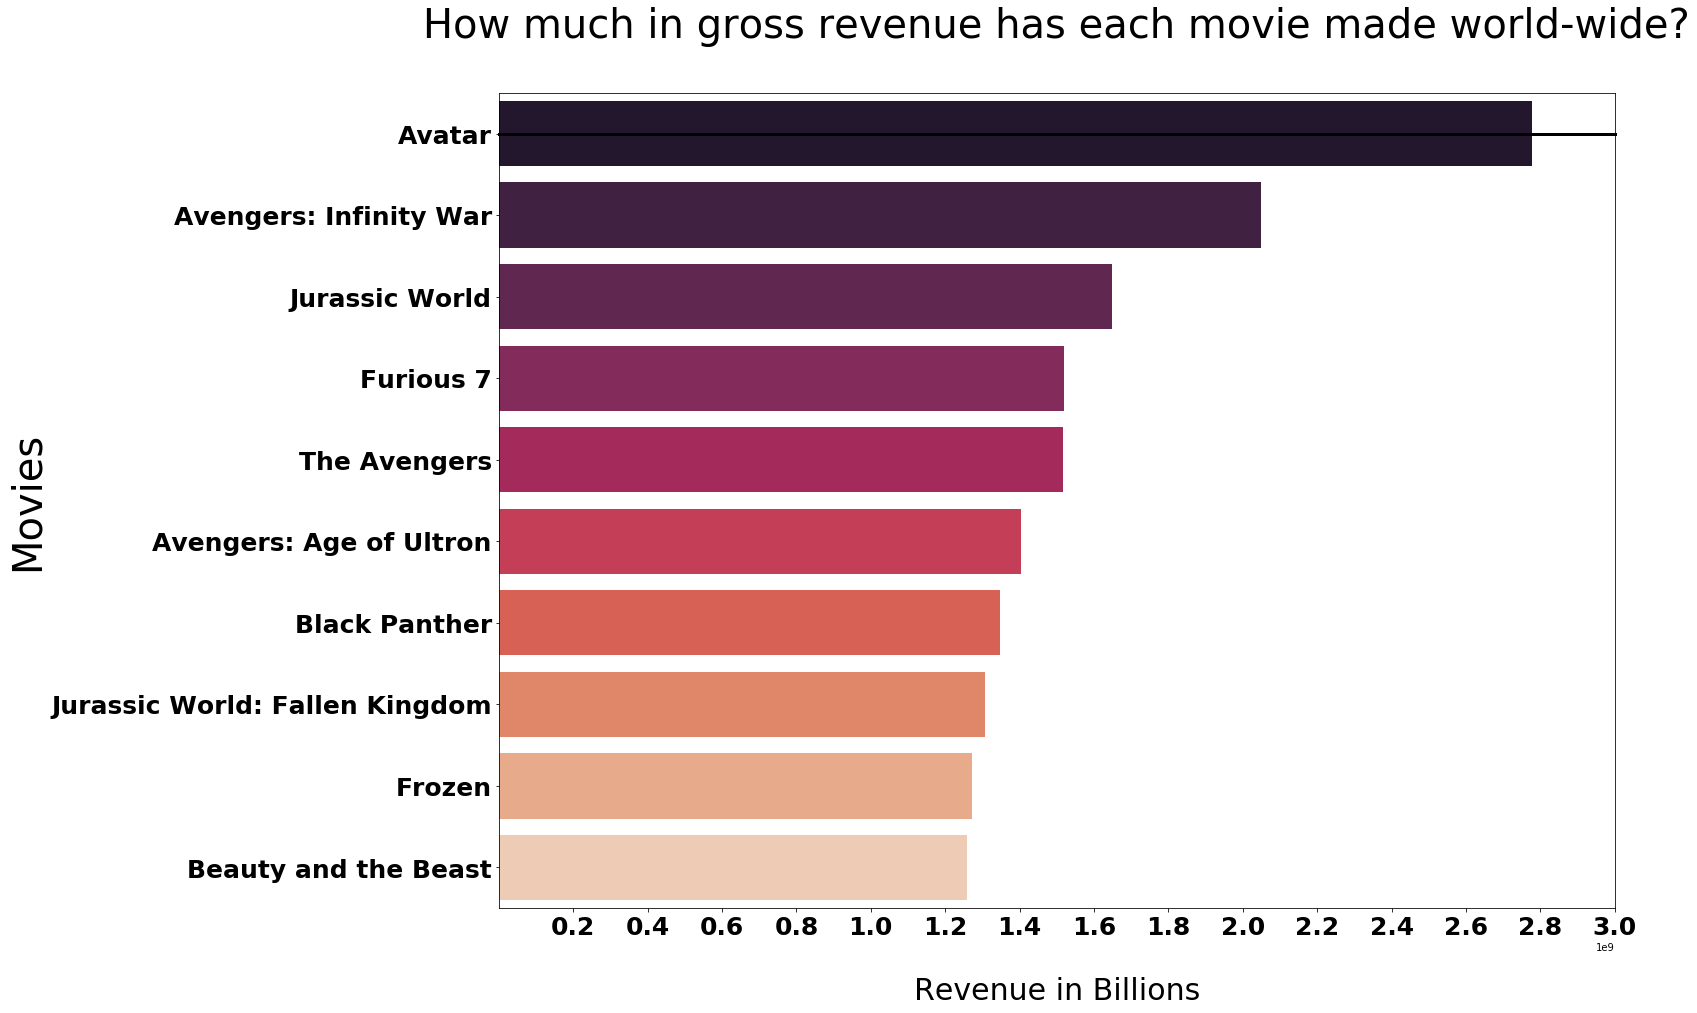

In [25]:
# I then begin to create my first plot and naming it 'movierevenue' to display the gross revenue each movie
# has made worldwide

movierevenue, (ax1) = plt.subplots(1, figsize=(20, 15), sharex=True)


x = gross
y1 = movie

# I'll be using seaborn to design all plots
sns.set_context('poster')
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)

# Setting ticks by even ammounts
plt.xticks([200000000,400000000,600000000,800000000,1000000000,
           1200000000,1400000000,1600000000,1800000000,2000000000,
           2200000000,2400000000,2600000000,2800000000,3000000000])

# Adjusting fontsize and weight for each tick on x and y axis
plt.xticks(fontsize=25,fontweight='bold')
plt.yticks(fontsize=25,fontweight='bold')

# Setting labels for x and y axis
plt.title("How much in gross revenue has each movie made world-wide?\n",fontsize=40)
ax1.set_ylabel("Movies",fontsize=40)
ax1.set_xlabel('\nRevenue in Billions',fontsize=30)


plt.show()

My next plot will be displaying the production budget of each movie, answering the question, "What was the starting budget?". 

In [26]:
# To begin my next plot figure i set the 'production_budget' column to the variable 'budget'

budget = df['production_budget']

In [27]:
budget

0     425000000
1     300000000
2     215000000
3     190000000
4     225000000
5     330600000
7     200000000
8     170000000
10    150000000
11    160000000
Name: production_budget, dtype: int64

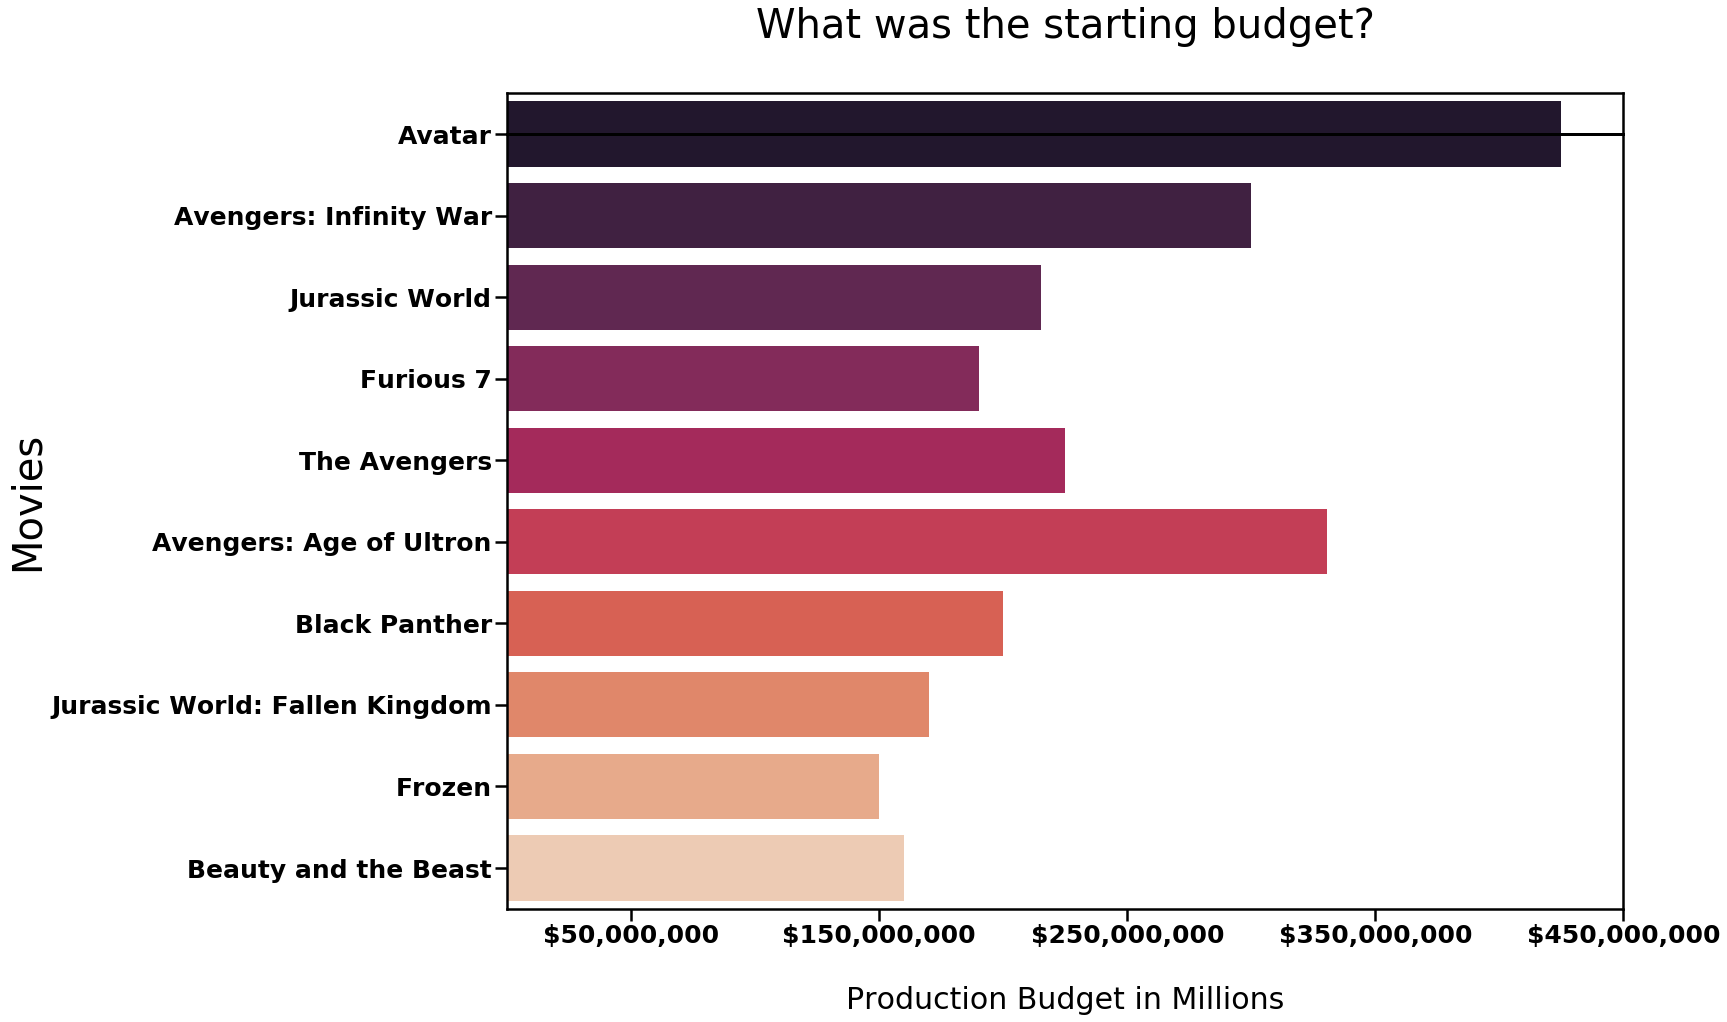

In [28]:
# After that i begin plotting a new figure named 'moviebudget' using the same steps i did before

moviebudget, (ax2) = plt.subplots(1, figsize=(20, 15), sharex=True)


x = budget
y2 = movie


sns.set_context('poster')
sns.barplot(x=x, y=y2, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)


plt.xticks([50000000,150000000,250000000,350000000,450000000])

# For this plot i wanted to show the full dollar amount considering i had room for the amount of intigers
# I used matplotlib.ticker to display the commas and dollar signs of each tick


fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax2.xaxis.set_major_formatter(tick)


plt.xticks(fontsize=25,fontweight='bold')
plt.yticks(fontsize=25,fontweight='bold')

plt.title("What was the starting budget?\n",fontsize=40)
ax2.set_ylabel("Movies",fontsize=40)
ax2.set_xlabel('\nProduction Budget in Millions',fontsize=30)

plt.show()

For my third plot, i wanted to show the profit each movie has made, by subtracting each movie's production budget from their world-wide gross revenue. By asking the question "How much profit did each movie make?", i can show that although the world-wide gross displays an increasing value from our 10th spot to our number 1 spot; the actual profit of each movie displays a realistic number of revenue.

In [29]:
# Next is the third plot and for this one, i will be plotting the profit amount each movie has made by
# subtracting the 'worldwide_gross' column from the 'production_budget' column and setting the results to the variable
# named 'profit'
profit = df['worldwide_gross'] - df['production_budget']  

In [30]:
profit

0     2351345279
1     1748134200
2     1433854864
3     1328722794
4     1292935897
5     1072413963
7     1148258224
8     1135772799
10    1122469910
11    1099199706
dtype: int64

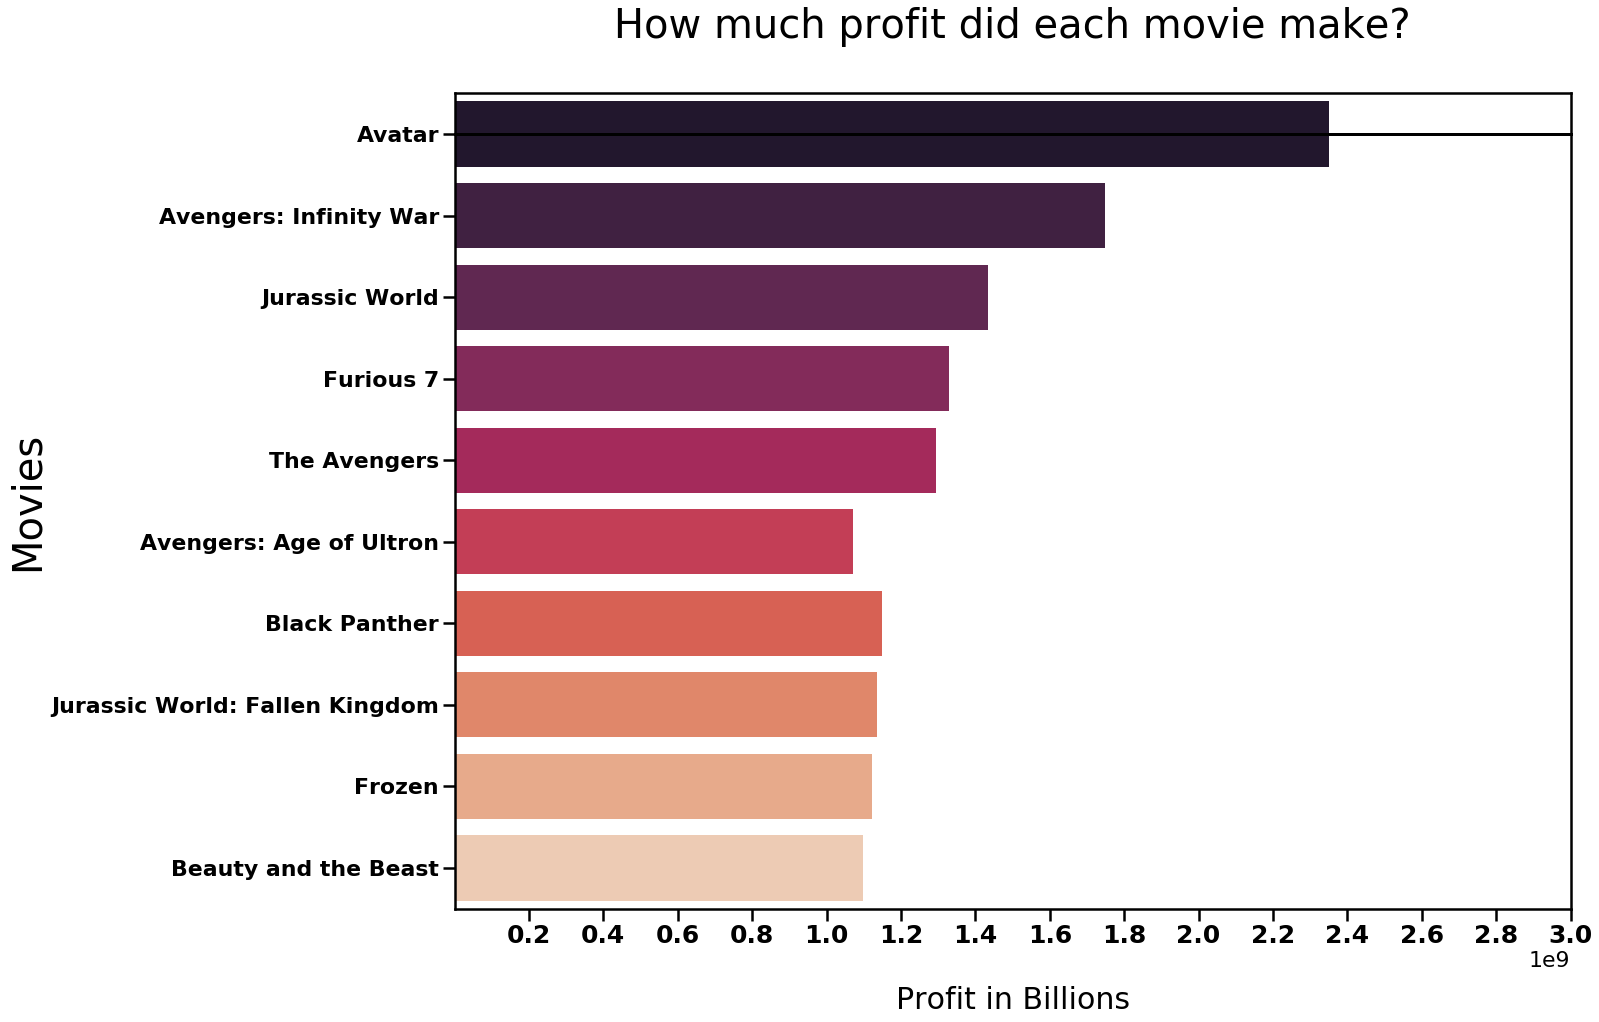

In [31]:
# I begin plotting another new figure, this time without the matplotlib.ticker function

movierevenue, (ax3) = plt.subplots(1, figsize=(20, 15), sharex=True)


x = profit
y3 = movie

sns.set_context('poster')
sns.barplot(x=x, y=y3, palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)



plt.yticks(fontweight='bold')
plt.xticks([200000000,400000000,600000000,800000000,1000000000,
           1200000000,1400000000,1600000000,1800000000,2000000000,
           2200000000,2400000000,2600000000,2800000000,3000000000],fontsize=25,fontweight='bold')

plt.title("How much profit did each movie make?\n",fontsize=40)
ax3.set_ylabel("Movies",fontsize=40)
ax3.set_xlabel('\nProfit in Billions',fontsize=30)

plt.show()

My final plot doesn't necessarily answer a question, however it still displays important information as far as popularity goes for each movie.

In [32]:
# Last but not least i then create my final plot figure named 'ratings' to display the average vote for each movie

ratings = df['vote_average']

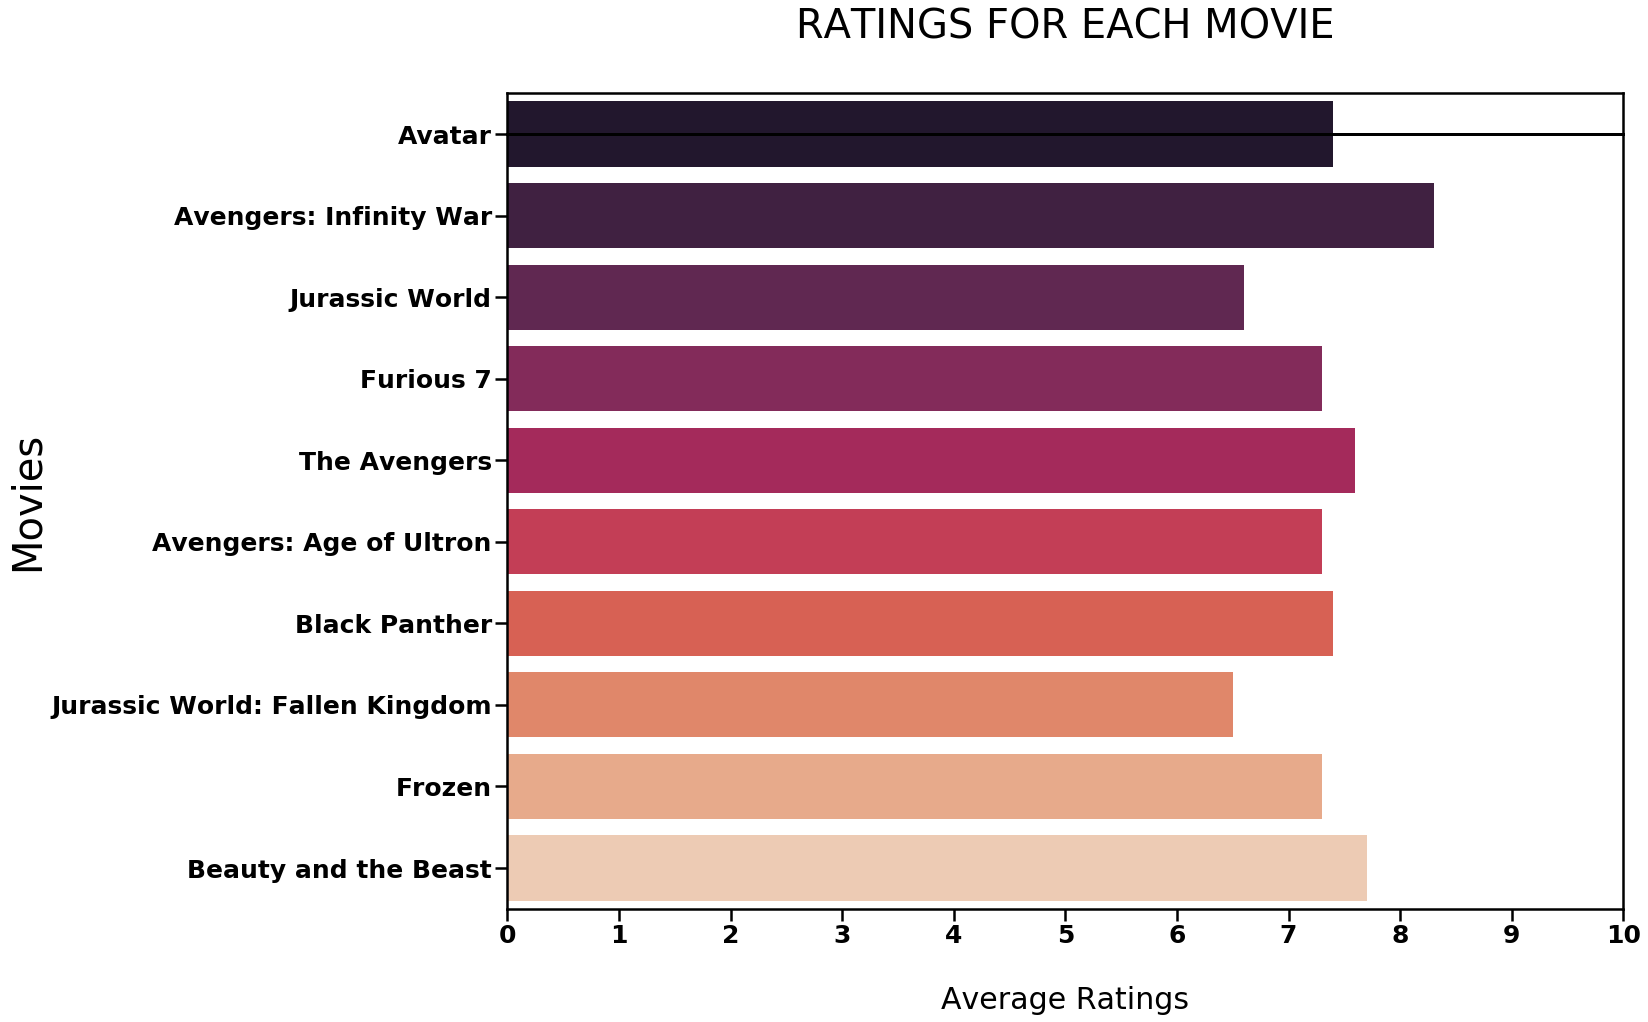

In [33]:
# Set up the matplotlib figure
movierevenue, (ax4) = plt.subplots(1, figsize=(20, 15), sharex=True)


x = ratings
y4 = movie


sns.set_context('poster')
sns.barplot(x=x, y=y3, palette="rocket", ax=ax4)
ax4.axhline(0, color="k", clip_on=False)

plt.yticks(fontsize=25,fontweight='bold')
plt.xticks(np.arange(0,11,1),fontsize=25,fontweight='bold')

plt.title("RATINGS FOR EACH MOVIE\n",fontsize=40)
ax4.set_ylabel("Movies",fontsize=40)
ax4.set_xlabel('\nAverage Ratings',fontsize=30)

plt.show()

Thus concluding my data analysis and visualizition to then create a presentation for my findings and what they mean.